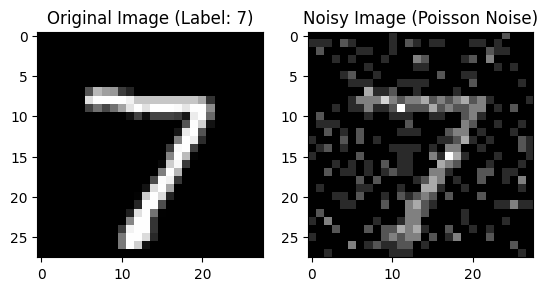

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.distributions import Poisson
import matplotlib.pyplot as plt

# Define lambda value for Poisson distribution
lambda_val = 1  # Adjust this value to control the amount of noise

# Define transform to add Poisson noise to an image
class PoissonNoiseTransform(object):
    def __init__(self, lambda_val):
        self.lambda_val = lambda_val
        self.poisson = Poisson(self.lambda_val)

    def __call__(self, image):
        noisy_image = self.poisson.sample(image.shape).to(torch.float32)
        return torch.clamp(image + noisy_image, 0, 255).to(torch.uint8)

# Load MNIST dataset with the specified transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    PoissonNoiseTransform(lambda_val)
])

transform_nonoise = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

original_test_dataset = MNIST(root='./data', train=False, download=False, transform=transform_nonoise)
original_test_loader = DataLoader(original_test_dataset, batch_size=1, shuffle=False)

# Load MNIST test dataset
test_dataset = MNIST(root='./data', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Iterate over the test dataset to apply the Poisson noise transform
for images, labels in test_loader:
    image = images[0]
    label = labels[0]
    break
    
for images2, labels2 in original_test_loader:
    image2 = images2[0]
    label2 = labels2[0]
    break
# Get a single image and its label


# Convert image tensor to numpy array and squeeze the dimensions
image_np = image.squeeze().numpy()
image_np2 = image2.squeeze().numpy()
# Plot the original and noisy images
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Image (Label: {})".format(label))
plt.imshow(image_np2, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Noisy Image (Poisson Noise)")
plt.imshow(image_np, cmap='gray')
plt.show()

# Exit the loop after displaying one image


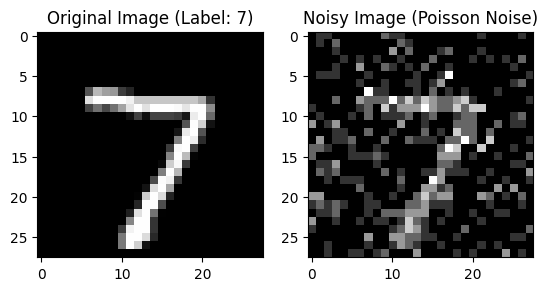

In [40]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.distributions import Poisson
import matplotlib.pyplot as plt

# Define lambda value for Poisson distribution
lambda_val = 1  # Adjust this value to control the amount of noise

# Define transform to add Poisson noise to an image
class PoissonNoiseTransform(object):
    def __init__(self, lambda_val):
        self.lambda_val = lambda_val
        self.poisson = Poisson(self.lambda_val)

    def __call__(self, image):
        noisy_image = self.poisson.sample(image.shape).to(torch.float32)
        return torch.clamp(image + noisy_image, 0, 255).to(torch.uint8)

# Load MNIST dataset with the specified transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    PoissonNoiseTransform(lambda_val)
])

transform_nonoise = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

original_test_dataset = MNIST(root='./data', train=False, download=False, transform=transform_nonoise)
original_test_loader = DataLoader(original_test_dataset, batch_size=1, shuffle=False)

# Load MNIST test dataset
test_dataset = MNIST(root='./data', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Iterate over the test dataset to apply the Poisson noise transform
for images, labels in test_loader:
    image = images[0]
    label = labels[0]
    break
    
for images2, labels2 in original_test_loader:
    image2 = images2[0]
    label2 = labels2[0]
    break
# Get a single image and its label


# Convert image tensor to numpy array and squeeze the dimensions
image_np = image.squeeze().numpy()
image_np2 = image2.squeeze().numpy()
# Plot the original and noisy images
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Image (Label: {})".format(label))
plt.imshow(image_np2, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Noisy Image (Poisson Noise)")
plt.imshow(image_np, cmap='gray')
plt.show()

# Exit the loop after displaying one image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


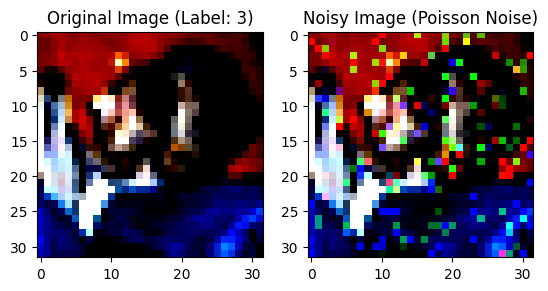

In [63]:
import torch
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.distributions import Poisson
import matplotlib.pyplot as plt
import numpy as np

# Define lambda value for Poisson distribution
lambda_val = 0.1  # Adjust this value to control the amount of noise

# Define transform to add Poisson noise to an image
class PoissonNoiseTransform(object):
    def __init__(self, lambda_val):
        self.lambda_val = lambda_val
        self.poisson = Poisson(self.lambda_val)

    def __call__(self, image):
        noisy_image = self.poisson.sample(image.shape).to(torch.float32)
        return torch.clamp(image + noisy_image, 0, 1)

# Load MNIST dataset with the specified transform
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616)),
            PoissonNoiseTransform(lambda_val)
            ])

transform_nonoise = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
            ])

original_test_dataset = CIFAR10(root='./data', train=False, download=False, transform=transform_nonoise)
original_test_loader = DataLoader(original_test_dataset, batch_size=1, shuffle=False)

# Load MNIST test dataset
test_dataset = CIFAR10(root='./data', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Iterate over the test dataset to apply the Poisson noise transform
for images, labels in test_loader:
    image = images[0]
    label = labels[0]
    break
    
for images2, labels2 in original_test_loader:
    image2 = images2[0]
    label2 = labels2[0]
    break
# Get a single image and its label

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original Image (Label: {})".format(label))
plt.imshow(image2.permute(1,2,0))
plt.subplot(1, 2, 2)
plt.title("Noisy Image (Poisson Noise)")
plt.imshow(image.permute(1,2,0))
plt.show()
